# Multiple pendulum plots. Section 12.8: Poincare Sections

Use Pendulum class to generate basic pendulum plots.  Applied here to Poincare sections as in Taylor Section 12.8.

* Last revised 24-Jan-2019 by Dick Furnstahl (furnstahl.1@osu.edu).

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt

## Pendulum class and utility functions

In [3]:
class Pendulum():
    """
    Pendulum class implements the parameters and differential equation for 
     a pendulum using the notation from Taylor.
     
    Parameters
    ----------
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    beta : float
        coefficient of friction 
    gamma_ext : float
        amplitude of external force is gamma * omega_0**2 
    omega_ext : float
        frequency of external force 
    phi_ext : float
        phase angle for external force 

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    driving_force(t) 
        Returns the value of the external driving force at time t.
    """
    def __init__(self, omega_0=1., beta=0.2,
                 gamma_ext=0.2, omega_ext=0.689, phi_ext=0.
                ):
        self.omega_0 = omega_0
        self.beta = beta
        self.gamma_ext = gamma_ext
        self.omega_ext = omega_ext
        self.phi_ext = phi_ext
    
    def dy_dt(self, y, t):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        y : float
            A 2-component vector with y[0] = phi(t) and y[1] = dphi/dt
        t : float
            time 
            
        Returns
        -------
        
        """
        F_ext = self.driving_force(t)
        return [y[1], -self.omega_0**2 * np.sin(y[0]) - 2.*self.beta * y[1] \
                       + F_ext]
    
    def driving_force(self, t):
        """
        This function returns the value of the driving force at time t.
        """
        return self.gamma_ext * self.omega_0**2 \
                              * np.cos(self.omega_ext*t + self.phi_ext)  
    
    def solve_ode(self, phi_0, phi_dot_0, abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_0, phi_dot_0]  
        phi, phi_dot = odeint(self.dy_dt, y, t_pts, 
                              atol=abserr, rtol=relerr).T
        return phi, phi_dot

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                points=False, ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        if not points:
            line, = ax.plot(x, y, label=label, 
                            color=color, linestyle=linestyle)
        else:
            line = ax.scatter(x, y, label=label,
                              color=color, marker='^')

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    """Given an array (e.g., of times) and desired starting and stop values,
        return the array indices that are closest to those values.
    """
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make plots for Taylor Figure 12.8

Plot a period doubling cascade as in Figure 12.8.  This will mean plots of four different conditions, each with two plots.

In [6]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 200.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common parameters
omega_ext = 2.*np.pi
phi_ext = 0.

# external period and index skip for every period
tau_ext = 2.*np.pi / omega_ext
delta_index = int(tau_ext / delta_t)

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate the pendulums
gamma_ext = 1.060
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

gamma_ext = 1.078
p2 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

gamma_ext = 1.081
p3 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

gamma_ext = 1.0826
p4 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

gamma_ext = 1.08294
p5 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts (all the same)
driving = p1.driving_force(t_pts)

# same initial conditions specified for each
phi_0 = -np.pi / 2.
phi_dot_0 = 0.

# solve each of the pendulum odes
abserr = 1.e-13
relerr = 1.e-13
phi_1, phi_dot_1 = p1.solve_ode(phi_0, phi_dot_0, 
                                abserr=abserr, relerr=relerr)
phi_2, phi_dot_2 = p2.solve_ode(phi_0, phi_dot_0, 
                                abserr=abserr, relerr=relerr)
phi_3, phi_dot_3 = p3.solve_ode(phi_0, phi_dot_0, 
                                abserr=abserr, relerr=relerr)
phi_4, phi_dot_4 = p4.solve_ode(phi_0, phi_dot_0, 
                                abserr=abserr, relerr=relerr)
phi_5, phi_dot_5 = p5.solve_ode(phi_0, phi_dot_0, 
                                abserr=abserr, relerr=relerr)


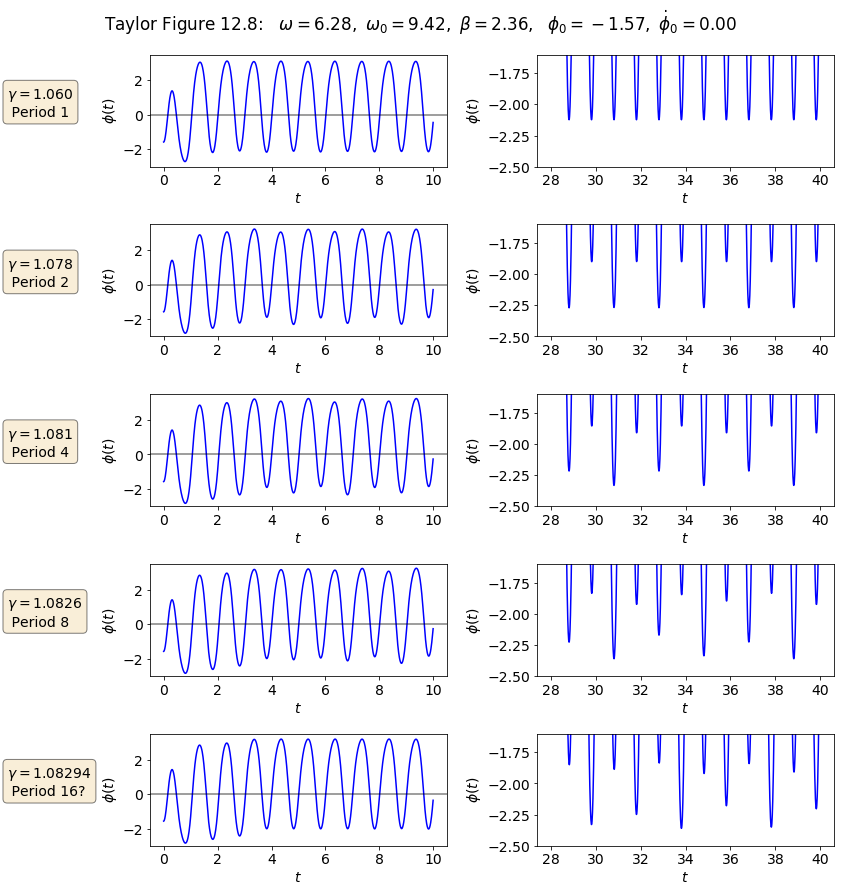

In [7]:

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})
box_props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# start the plot!
fig = plt.figure(figsize=(12,12))
overall_title = 'Taylor Figure 12.8:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf'  $\phi_0 = {phi_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# plot 1a: plot from t=0 to t=10   
ax_1a = fig.add_subplot(5,2,1)                  
start, stop = start_stop_indices(t_pts, 0., 10.)    
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_1a) 
ax_1a.set_ylim(-3, 3.5)
ax_1a.axhline(y=0., color='black', alpha=0.5)
textstr = r'$\gamma = 1.060$' + '\n' + r' Period 1'
ax_1a.text(-5.8, 0., textstr, bbox=box_props)
    
# plot 1b: plot from t=28 to t=40 blown up   
ax_1b = fig.add_subplot(5,2,2)                  
start, stop = start_stop_indices(t_pts, 28., 40.)    
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_1b) 
ax_1b.set_ylim(-2.5, -1.6)
    
# plot 2a: plot from t=0 to t=10   
ax_2a = fig.add_subplot(5,2,3)                  
start, stop = start_stop_indices(t_pts, 0., 10.)    
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_2a) 
ax_2a.set_ylim(-3, 3.5)
ax_2a.axhline(y=0., color='black', alpha=0.5)
textstr = r'$\gamma = 1.078$' + '\n' + r' Period 2'
ax_2a.text(-5.8, 0., textstr, bbox=box_props)
    
# plot 2b: plot from t=28 to t=40 blown up   
ax_2b = fig.add_subplot(5,2,4)                  
start, stop = start_stop_indices(t_pts, 28., 40.)    
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_2b) 
ax_2b.set_ylim(-2.5, -1.6)
    
# plot 3a: plot from t=0 to t=10   
ax_3a = fig.add_subplot(5,2,5)                  
start, stop = start_stop_indices(t_pts, 0., 10.)    
plot_y_vs_x(t_pts[start : stop], phi_3[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_3a) 
ax_3a.set_ylim(-3, 3.5)
ax_3a.axhline(y=0., color='black', alpha=0.5)
textstr = r'$\gamma = 1.081$' + '\n' + r' Period 4'
ax_3a.text(-5.8, 0., textstr, bbox=box_props)
    
# plot 3b: plot from t=28 to t=40 blown up   
ax_3b = fig.add_subplot(5,2,6)                  
start, stop = start_stop_indices(t_pts, 28., 40.)    
plot_y_vs_x(t_pts[start : stop], phi_3[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_3b) 
ax_3b.set_ylim(-2.5, -1.6)
    
# plot 4a: plot from t=0 to t=10   
ax_4a = fig.add_subplot(5,2,7)                  
start, stop = start_stop_indices(t_pts, 0., 10.)    
plot_y_vs_x(t_pts[start : stop], phi_4[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_4a) 
ax_4a.set_ylim(-3, 3.5)
ax_4a.axhline(y=0., color='black', alpha=0.5)
textstr = r'$\gamma = 1.0826$' + '\n' + r' Period 8'
ax_4a.text(-5.8, 0., textstr, bbox=box_props)
    
# plot 4b: plot from t=28 to t=40 blown up   
ax_4b = fig.add_subplot(5,2,8)                  
start, stop = start_stop_indices(t_pts, 28., 40.)    
plot_y_vs_x(t_pts[start : stop], phi_4[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_4b) 
ax_4b.set_ylim(-2.5, -1.6)
    
# plot 5a: plot from t=0 to t=10   
ax_5a = fig.add_subplot(5,2,9)                  
start, stop = start_stop_indices(t_pts, 0., 10.)    
plot_y_vs_x(t_pts[start : stop], phi_5[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_5a) 
ax_5a.set_ylim(-3, 3.5)
ax_5a.axhline(y=0., color='black', alpha=0.5)
textstr = r'$\gamma = 1.08294$' + '\n' + r' Period 16?'
ax_5a.text(-5.8, 0., textstr, bbox=box_props)
    
# plot 4b: plot from t=28 to t=40 blown up   
ax_5b = fig.add_subplot(5,2,10)                  
start, stop = start_stop_indices(t_pts, 28., 40.)    
plot_y_vs_x(t_pts[start : stop], phi_5[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            ax=ax_5b) 
ax_5b.set_ylim(-2.5, -1.6)

fig.tight_layout()
fig.savefig('Figure_12.8.png', bbox_inches='tight')  # always bbox_inches='tight'

Now for the state space plot and Poincare section.

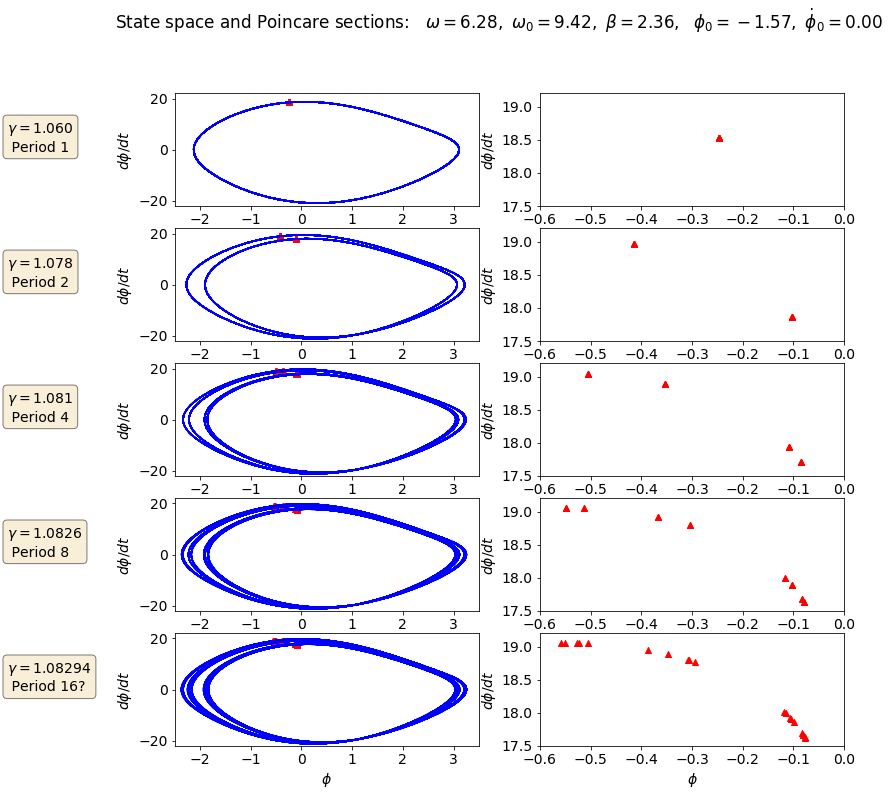

In [8]:

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})
box_props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

y_min = -22.
y_max = 22.
x_min = -2.5
x_max = 3.5
y_min_ps = 17.5
y_max_ps = 19.2
x_min_ps = -0.6
x_max_ps = 0.0

# start the plot!
fig_ss = plt.figure(figsize=(12,12))
overall_title = 'State space and Poincare sections:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf'  $\phi_0 = {phi_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$'
                #'\n'     # \n means a new line (adds some space here)
fig_ss.suptitle(overall_title)
    
# plot 1a: state space plot from t=40. to t=100.   
ax_ss_1a = fig_ss.add_subplot(5,2,1)                  
start, stop = start_stop_indices(t_pts, 40., 100.)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            ax=ax_ss_1a) 
plot_y_vs_x(phi_1[start : stop: delta_index], 
            phi_dot_1[start : stop : delta_index],
            axis_labels=state_space_labels, 
            color='red',
            label=None,
            points=True,
            ax=ax_ss_1a) 
ax_ss_1a.set_ylim(y_min, y_max)
ax_ss_1a.set_xlim(x_min, x_max)
textstr = r'$\gamma = 1.060$' + '\n' + r' Period 1'
ax_ss_1a.text(-5.8, 0., textstr, bbox=box_props)
    
# plot 1b: poincare plot from t=100 to t=120.  
ax_ss_1b = fig_ss.add_subplot(5,2,2)                  
start, stop = start_stop_indices(t_pts, 100., 120.)    
plot_y_vs_x(phi_1[start : stop: delta_index], 
            phi_dot_1[start : stop : delta_index],
            axis_labels=state_space_labels, 
            color='red',
            label=None,
            points=True,
            ax=ax_ss_1b) 
ax_ss_1b.set_ylim(y_min_ps, y_max_ps)
ax_ss_1b.set_xlim(x_min_ps, x_max_ps)
    
# plot 2a: state space plot from t=40. to t=100.  
ax_ss_2a = fig_ss.add_subplot(5,2,3)                  
start, stop = start_stop_indices(t_pts, 40., 100.)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            ax=ax_ss_2a) 
plot_y_vs_x(phi_2[start : stop: delta_index], 
            phi_dot_2[start : stop : delta_index],
            axis_labels=state_space_labels, 
            color='red',
            points=True,
            label=None, 
            ax=ax_ss_2a) 
ax_ss_2a.set_ylim(y_min, y_max)
ax_ss_2a.set_xlim(x_min, x_max)
textstr = r'$\gamma = 1.078$' + '\n' + r' Period 2'
ax_ss_2a.text(-5.8, 0., textstr, bbox=box_props)
    
# plot 2b: poincare plot from t=100 to t=120.  
ax_ss_2b = fig_ss.add_subplot(5,2,4)                  
start, stop = start_stop_indices(t_pts, 100., 120.)    
plot_y_vs_x(phi_2[start : stop: delta_index], 
            phi_dot_2[start : stop : delta_index],
            axis_labels=state_space_labels, 
            color='red',
            points=True,
            label=None, 
            ax=ax_ss_2b) 
ax_ss_2b.set_ylim(y_min_ps, y_max_ps)
ax_ss_2b.set_xlim(x_min_ps, x_max_ps)
    
# plot 3a: state space plot from t=40. to t=100.  
ax_ss_3a = fig_ss.add_subplot(5,2,5)                  
start, stop = start_stop_indices(t_pts, 40., 100.)    
plot_y_vs_x(phi_3[start : stop], phi_dot_3[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            ax=ax_ss_3a) 
plot_y_vs_x(phi_3[start : stop: delta_index], 
            phi_dot_3[start : stop : delta_index],
            axis_labels=state_space_labels, 
            color='red',
            points=True,
            label=None, 
            ax=ax_ss_3a) 
ax_ss_3a.set_ylim(y_min, y_max)
ax_ss_3a.set_xlim(x_min, x_max)
textstr = r'$\gamma = 1.081$' + '\n' + r' Period 4'
ax_ss_3a.text(-5.8, 0., textstr, bbox=box_props)
    
# plot 3b: poincare plot from t=100 to t=120.  
ax_ss_3b = fig_ss.add_subplot(5,2,6)                  
start, stop = start_stop_indices(t_pts, 100., 120.)    
plot_y_vs_x(phi_3[start : stop: delta_index], 
            phi_dot_3[start : stop : delta_index],
            axis_labels=state_space_labels, 
            color='red',
            points=True,
            label=None, 
            ax=ax_ss_3b) 
ax_ss_3b.set_ylim(y_min_ps, y_max_ps)
ax_ss_3b.set_xlim(x_min_ps, x_max_ps)
    
# plot 4a: state space plot from t=40. to t=100.  
ax_ss_4a = fig_ss.add_subplot(5,2,7)                  
start, stop = start_stop_indices(t_pts, 40., 100.)    
plot_y_vs_x(phi_4[start : stop], phi_dot_4[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            ax=ax_ss_4a) 
plot_y_vs_x(phi_4[start : stop: delta_index], 
            phi_dot_4[start : stop : delta_index],
            axis_labels=state_space_labels, 
            color='red',
            points=True,
            label=None, 
            ax=ax_ss_4a) 
ax_ss_4a.set_ylim(y_min, y_max)
ax_ss_4a.set_xlim(x_min, x_max)
textstr = r'$\gamma = 1.0826$' + '\n' + r' Period 8'
ax_ss_4a.text(-5.8, 0., textstr, bbox=box_props)
    
# plot 4b: poincare plot from t=100 to t=120.  
ax_ss_4b = fig_ss.add_subplot(5,2,8)                  
start, stop = start_stop_indices(t_pts, 100., 120.)    
plot_y_vs_x(phi_4[start : stop: delta_index], 
            phi_dot_4[start : stop : delta_index],
            axis_labels=state_space_labels, 
            color='red',
            points=True,
            label=None, 
            ax=ax_ss_4b) 
ax_ss_4b.set_ylim(y_min_ps, y_max_ps)
ax_ss_4b.set_xlim(x_min_ps, x_max_ps)
    
# plot 5a: state space plot from t=40. to t=100.  
ax_ss_5a = fig_ss.add_subplot(5,2,9)                  
start, stop = start_stop_indices(t_pts, 40., 100.)    
plot_y_vs_x(phi_5[start : stop], phi_dot_5[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            ax=ax_ss_5a) 
plot_y_vs_x(phi_5[start : stop: delta_index], 
            phi_dot_5[start : stop : delta_index],
            axis_labels=state_space_labels, 
            color='red',
            points=True,
            label=None, 
            ax=ax_ss_5a) 
ax_ss_5a.set_ylim(y_min, y_max)
ax_ss_5a.set_xlim(x_min, x_max)
textstr = r'$\gamma = 1.08294$' + '\n' + r' Period 16?'
ax_ss_5a.text(-5.8, 0., textstr, bbox=box_props)
    
# plot 5b: poincare plot from t=100 to t=120.  
ax_ss_5b = fig_ss.add_subplot(5,2,10)                  
start, stop = start_stop_indices(t_pts, 100., 120.)    
plot_y_vs_x(phi_5[start : stop: delta_index], 
            phi_dot_5[start : stop : delta_index],
            axis_labels=state_space_labels, 
            color='red',
            points=True,
            label=None, 
            ax=ax_ss_5b) 
ax_ss_5b.set_ylim(y_min_ps, y_max_ps)
ax_ss_5b.set_xlim(x_min_ps, x_max_ps)

fig.tight_layout()
fig.savefig('Figure_12.8_state_space_and_Poincare.png', bbox_inches='tight')  
# always bbox_inches='tight'

In [9]:
# Periodicity check
start, stop = start_stop_indices(t_pts, 100., 140.)    
tau_ext = 2.*np.pi / omega_ext
delta_index = int(tau_ext / delta_t)

print('   t      phi(t)   phi_dot(t)')
for index in range(start, stop, delta_index):
    print(f'  {t_pts[index]:.1f}   {phi_4[index]:.4f}   {phi_dot_4[index]:.4f}')

   t      phi(t)   phi_dot(t)
  100.0   -0.1035   17.8905
  101.0   -0.3665   18.9156
  102.0   -0.0787   17.6373
  103.0   -0.5485   19.0568
  104.0   -0.1166   17.9977
  105.0   -0.3049   18.7946
  106.0   -0.0828   17.6829
  107.0   -0.5125   19.0504
  108.0   -0.1035   17.8903
  109.0   -0.3666   18.9158
  110.0   -0.0787   17.6374
  111.0   -0.5485   19.0568
  112.0   -0.1166   17.9976
  113.0   -0.3049   18.7947
  114.0   -0.0828   17.6828
  115.0   -0.5125   19.0504
  116.0   -0.1035   17.8904
  117.0   -0.3666   18.9157
  118.0   -0.0787   17.6373
  119.0   -0.5485   19.0568
  120.0   -0.1166   17.9976
  121.0   -0.3049   18.7946
  122.0   -0.0828   17.6828
  123.0   -0.5125   19.0504
  124.0   -0.1035   17.8904
  125.0   -0.3666   18.9157
  126.0   -0.0787   17.6374
  127.0   -0.5485   19.0568
  128.0   -0.1166   17.9976
  129.0   -0.3049   18.7947
  130.0   -0.0828   17.6828
  131.0   -0.5125   19.0504
  132.0   -0.1035   17.8904
  133.0   -0.3666   18.9157
  134.0   -0.0787 

In [10]:
# Periodicity check
start, stop = start_stop_indices(t_pts, 100., 140.)    
tau_ext = 2.*np.pi / omega_ext
delta_index = int(tau_ext / delta_t)

print('   t      phi(t)   phi_dot(t)')
for index in range(start, stop, delta_index):
    print(f'  {t_pts[index]:.1f}   {phi_5[index]:.4f}   {phi_dot_5[index]:.4f}')

   t      phi(t)   phi_dot(t)
  100.0   -0.3083   18.8043
  101.0   -0.0808   17.6616
  102.0   -0.5266   19.0559
  103.0   -0.1066   17.9185
  104.0   -0.3472   18.8841
  105.0   -0.0774   17.6231
  106.0   -0.5577   19.0587
  107.0   -0.1187   18.0146
  108.0   -0.2936   18.7691
  109.0   -0.0834   17.6902
  110.0   -0.5043   19.0494
  111.0   -0.0993   17.8542
  112.0   -0.3870   18.9480
  113.0   -0.0781   17.6318
  114.0   -0.5503   19.0587
  115.0   -0.1156   17.9910
  116.0   -0.3061   18.7992
  117.0   -0.0812   17.6654
  118.0   -0.5236   19.0552
  119.0   -0.1055   17.9096
  120.0   -0.3525   18.8936
  121.0   -0.0773   17.6217
  122.0   -0.5589   19.0587
  123.0   -0.1192   18.0183
  124.0   -0.2917   18.7642
  125.0   -0.0838   17.6946
  126.0   -0.5009   19.0481
  127.0   -0.0983   17.8449
  128.0   -0.3930   18.9563
  129.0   -0.0785   17.6368
  130.0   -0.5462   19.0585
  131.0   -0.1139   17.9782
  132.0   -0.3131   18.8151
  133.0   -0.0801   17.6540
  134.0   -0.5327 